In [1]:
from google.cloud import bigquery
import os
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../../../gcp_credentials.json'
client = bigquery.Client()

In [2]:
query = """
    select
      address,
      farcaster_prepermissionless > 0 as farcaster_prepermissionless,
      eigentrust_verification > 0 as eigentrust_verification,
      passport_verification > 0 as passport_verification,
      optimist_nft_verification > 0 as optimist_nft_verification,
      airdrop_verification > 0 as airdrop_verification
    from `opensource-observer.oso.rf4_trusted_users`
    where is_trusted_user = True
"""
results = client.query(query)

In [3]:
df = results.to_dataframe()
df.head(1)

,address,farcaster_prepermissionless,eigentrust_verification,passport_verification,optimist_nft_verification,airdrop_verification
0,0x21aa4bb76c5ee4727a3cc29f0a56ec47a018453e,True,False,False,False,False


In [4]:
len(df)

90714

In [5]:
df = df[df['address'].str.contains('0x') == True]
df.set_index('address', inplace=True)
len(df)

83753

In [6]:
df.corr()

,farcaster_prepermissionless,eigentrust_verification,passport_verification,optimist_nft_verification,airdrop_verification
farcaster_prepermissionless,1.000000,0.125265,-0.287054,0.086661,-0.081948
eigentrust_verification,0.125265,1.000000,-0.677823,-0.125421,-0.229539
passport_verification,-0.287054,-0.677823,1.000000,-0.121849,0.120036
optimist_nft_verification,0.086661,-0.125421,-0.121849,1.000000,-0.040561
airdrop_verification,-0.081948,-0.229539,0.120036,-0.040561,1.000000


In [7]:
df.sum(axis=0)

farcaster_prepermissionless    14999
eigentrust_verification        37565
passport_verification          40023
optimist_nft_verification       3194
airdrop_verification           15800
dtype: int64

<Axes: >

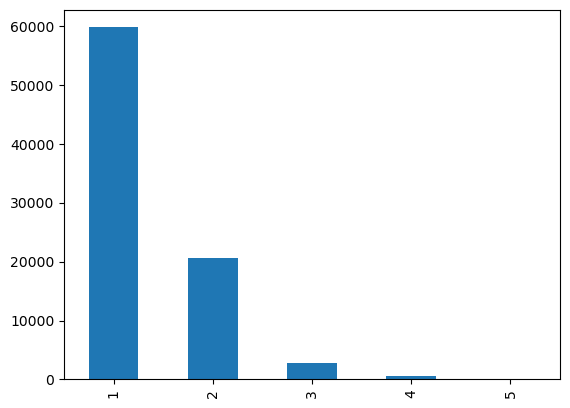

In [8]:
df.sum(axis=1).value_counts().plot(kind='bar')

In [9]:
df.sort_index().reset_index()['address'].to_csv('data/op_rf4_trusted_addresses.csv')